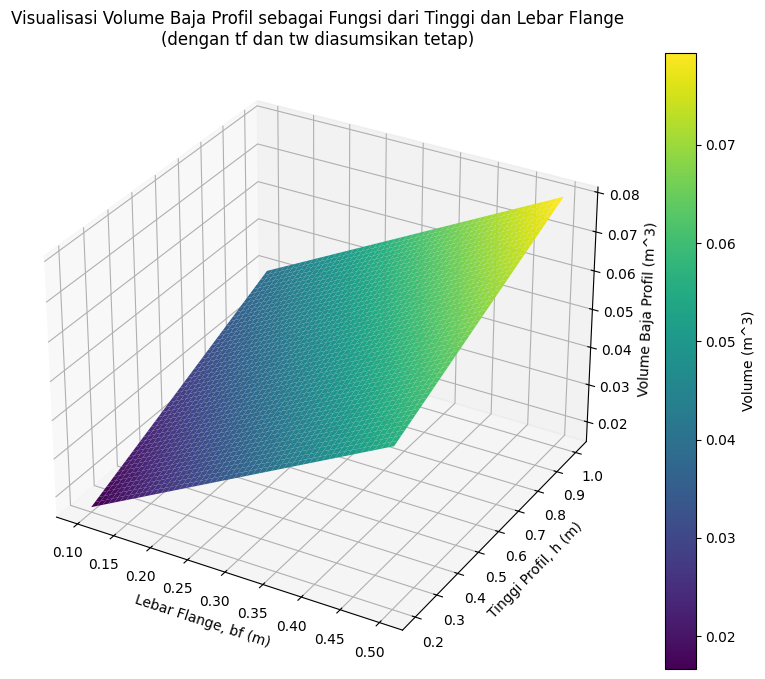

Generated 450 valid combinations.
Valid Combinations:
Combination 1: h=0.1000 m, bf=0.1000 m, tf=0.0060 m, tw=0.0050 m
Combination 2: h=0.1000 m, bf=0.1000 m, tf=0.0070 m, tw=0.0050 m
Combination 3: h=0.1000 m, bf=0.1000 m, tf=0.0070 m, tw=0.0060 m
Combination 4: h=0.1000 m, bf=0.1000 m, tf=0.0090 m, tw=0.0050 m
Combination 5: h=0.1000 m, bf=0.1000 m, tf=0.0090 m, tw=0.0060 m
Combination 6: h=0.1000 m, bf=0.1000 m, tf=0.0090 m, tw=0.0070 m
Combination 7: h=0.1000 m, bf=0.1000 m, tf=0.0120 m, tw=0.0050 m
Combination 8: h=0.1000 m, bf=0.1000 m, tf=0.0120 m, tw=0.0060 m
Combination 9: h=0.1000 m, bf=0.1000 m, tf=0.0120 m, tw=0.0070 m
Combination 10: h=0.1000 m, bf=0.1000 m, tf=0.0120 m, tw=0.0090 m
Combination 11: h=0.1500 m, bf=0.1000 m, tf=0.0060 m, tw=0.0050 m
Combination 12: h=0.1500 m, bf=0.1000 m, tf=0.0070 m, tw=0.0050 m
Combination 13: h=0.1500 m, bf=0.1000 m, tf=0.0070 m, tw=0.0060 m
Combination 14: h=0.1500 m, bf=0.1000 m, tf=0.0090 m, tw=0.0050 m
Combination 15: h=0.1500 m, bf=

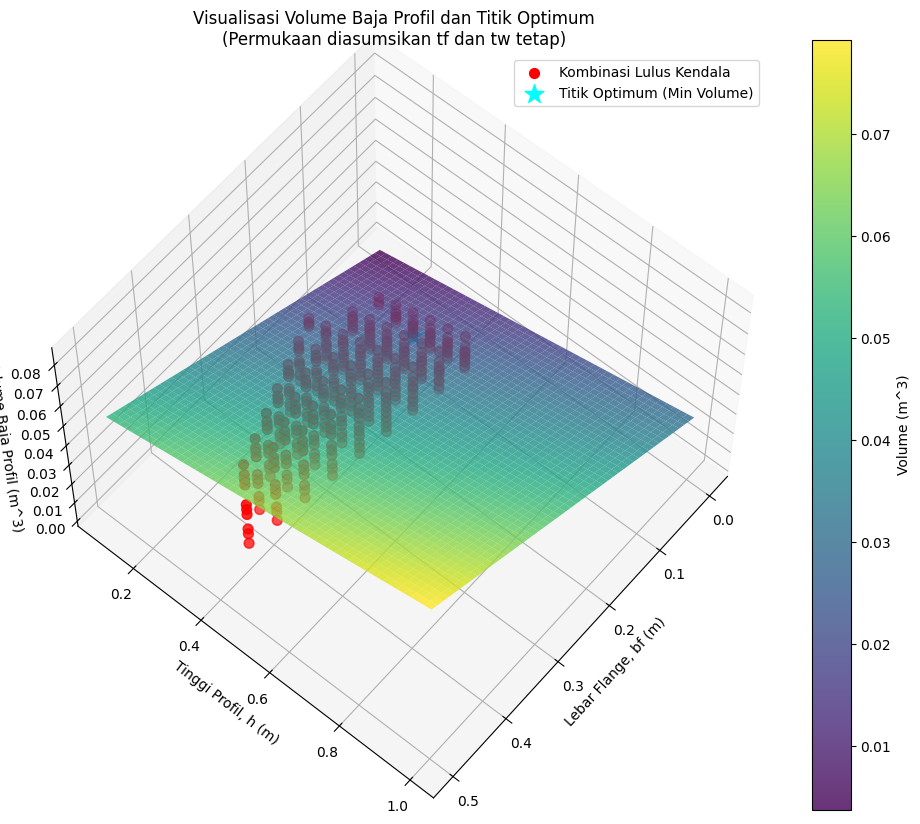

In [1]:
# --- 0. Global Constants ---
# Material Properties
E = 200 * (10**9)  # N/m^2 (Modulus Elastisitas Baja)
sigma_izin = 160 * (10**6)  # N/m^2 (Tegangan Izin Baja)
density_steel = 7850  # kg/m^3 (Densitas Baja)

# Loading and Geometry (KONSTAN)
P = 40000    # N (Beban Terpusat: 500 kg = 5000 N)
L = 5.0      # m (Bentang Balok: KONSTAN 3.0 m)

# Numerical Stability Constant
EPSILON = 1e-9 # Define EPSILON as a small positive number

# --- 1. Helper Functions for IWF Properties ---
# Fungsi-fungsi ini mengasumsikan input sudah divalidasi oleh is_geometry_valid
def calculate_I_x(h, bf, tf, tw):
    """Menghitung Momen Inersia (Ix) untuk penampang IWF."""
    I_x_flange_centroid = (1/12) * bf * tf**3
    A_flange = bf * tf
    y_flange = (h/2) - (tf/2)
    I_x_flange = 2 * (I_x_flange_centroid + A_flange * y_flange**2)

    I_x_web = (1/12) * tw * (h - 2*tf)**3
    return I_x_flange + I_x_web

def calculate_W_z(h, I_x_val):
    """Menghitung Modulus Penampang (Wz) untuk penampang IWF."""
    if h <= EPSILON: # Proteksi dari h mendekati nol
        return EPSILON # Mengembalikan nilai kecil jika h tidak valid
    return I_x_val / (h / 2)

def calculate_area(h, bf, tf, tw):
    """Menghitung luas penampang (A) untuk penampang IWF."""
    return 2 * (bf * tf) + (h - 2*tf) * tw


# prompt: tambahkan fungsi objective minimize volume balok dimana volume = (h*tw + 2*bf*tf)*L

# --- 2. Objective Function ---
def objective_function(params):
    """Fungsi objektif untuk diminimalkan (Volume balok)."""
    h, bf, tf, tw = params
    # Volume = Luas Penampang * Panjang
    area = (h * tw + 2 * bf * tf)
    volume = area * L
    return volume

# prompt: Visualisasi Volume Baja Profil sebagai Fungsi dari Tinggi dan Lebar Flange

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 5. Visualisasi Volume ---

# Buat rentang nilai untuk bf dan h
# Pilih rentang yang masuk akal berdasarkan profil IWF standar
bf_range = np.linspace(0.1, 0.5, 50)  # Rentang lebar flange (m)
h_range = np.linspace(0.2, 1.0, 50)  # Rentang tinggi profil (m)

# Asumsi nilai tf dan tw yang tetap untuk simplifikasi visualisasi
# Anda bisa menggunakan nilai tipikal dari profil standar
tf_fixed = 0.01  # Tebal flange (m) - contoh
tw_fixed = 0.006  # Tebal web (m) - contoh

# Buat grid untuk bf dan h
BF, H = np.meshgrid(bf_range, h_range)

# Hitung volume untuk setiap kombinasi bf dan h
VOLUME = objective_function([H, BF, np.full_like(BF, tf_fixed), np.full_like(BF, tw_fixed)])

# Buat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot permukaan
surf = ax.plot_surface(BF, H, VOLUME, cmap='viridis', edgecolor='none')

# Atur label sumbu
ax.set_xlabel('Lebar Flange, bf (m)')
ax.set_ylabel('Tinggi Profil, h (m)')
ax.set_zlabel('Volume Baja Profil (m^3)')
ax.set_title('Visualisasi Volume Baja Profil sebagai Fungsi dari Tinggi dan Lebar Flange\n(dengan tf dan tw diasumsikan tetap)')

# Tambahkan color bar
fig.colorbar(surf, label='Volume (m^3)')

plt.show()


# prompt: tambah kombinasi untuk besaran nilai h, bf, tf, tw. h dan bf nilainya berada antara 100-500 (100,150,200,250,300,350,400,450 dan 500) namun nilai bf adalah tidak boleh lebih besar dari nilai h. nilai tf dan tw 5 mm, 6 mm , 7 mm, 9 mm dan 12 mm. namun nilai tf harus lebih bsar dari tw

import numpy as np
def generate_valid_combinations():
    """
    Menghasilkan kombinasi parameter h, bf, tf, tw yang valid
    berdasarkan batasan yang diberikan.
    """
    h_values = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500]) * 1e-3 # Convert mm to meters
    bf_values = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500]) * 1e-3 # Convert mm to meters
    t_values = np.array([5, 6, 7, 9, 12]) * 1e-3 # Convert mm to meters

    valid_combinations = []
    for h in h_values:
        for bf in bf_values:
            # bf tidak boleh lebih besar dari h
            if bf <= h:
                for tf in t_values:
                    for tw in t_values:
                        # tf harus lebih besar dari tw
                        if tf > tw:
                            valid_combinations.append((h, bf, tf, tw))
    return valid_combinations

# Example usage:
valid_configs = generate_valid_combinations()
print(f"Generated {len(valid_configs)} valid combinations.")
# print(valid_configs[:10]) # Print first 10 combinations as an example


# prompt: tampilkan 450 valid combinations.

print("Valid Combinations:")
for i, combo in enumerate(valid_configs[:450]): # Displaying the first 450 valid combinations
    print(f"Combination {i+1}: h={combo[0]:.4f} m, bf={combo[1]:.4f} m, tf={combo[2]:.4f} m, tw={combo[3]:.4f} m")


# prompt: tambah konstrain untuk balok yang dengan tumpuan kiri kanan dengan beban terpusat tengah 1. Kendala lendutan: delta_actual <= delta_izin, 2. Kendala tegangan: sigma_actual <= sigma_izin
# dan lakukan uji coba terhadap 450 valid combinations.

import numpy as np
# --- 3. Constraint Functions ---
def deflection_constraint(params):
    """Kendala Lendutan: delta_actual <= delta_izin."""
    h, bf, tf, tw = params
    I_x_val = calculate_I_x(h, bf, tf, tw)

    # Proteksi dari I_x_val mendekati nol (jika geometri tidak valid)
    if I_x_val <= np.finfo(float).eps:
        return -1 # Mengembalikan nilai negatif untuk menandakan pelanggaran kendala

    # Rumus lendutan maksimum untuk balok sederhana dengan beban terpusat di tengah
    delta_actual = (P * L**3) / (48 * E * I_x_val)

    # Asumsi delta_izin (misal: L/360 untuk balok struktural)
    delta_izin = L / 360

    return delta_izin - delta_actual # Harus >= 0 untuk terpenuhi

def stress_constraint(params):
    """Kendala Tegangan Lentur: sigma_actual <= sigma_izin."""
    h, bf, tf, tw = params
    I_x_val = calculate_I_x(h, bf, tf, tw)

    # Proteksi dari I_x_val mendekati nol
    if I_x_val <= np.finfo(float).eps:
        return -1 # Mengembalikan nilai negatif untuk menandakan pelanggaran kendala

    W_z_val = calculate_W_z(h, I_x_val)

    # Proteksi dari W_z_val mendekati nol
    if W_z_val <= np.finfo(float).eps:
         return -1 # Mengembalikan nilai negatif untuk menandakan pelanggaran kendala

    # Rumus momen lentur maksimum untuk balok sederhana dengan beban terpusat di tengah
    M_max = (P * L) / 4

    sigma_actual = M_max / W_z_val

    return sigma_izin - sigma_actual # Harus >= 0 untuk terpenuhi

# --- 4. Combine Constraints and Test Combinations ---
constraints = [
    {'type': 'ineq', 'fun': deflection_constraint},
    {'type': 'ineq', 'fun': stress_constraint}
]

print("\nTesting Valid Combinations against Constraints:")
passing_combinations = []

# Limit to the first 450 combinations for testing as requested
for i, combo in enumerate(valid_configs[:450]):
    h, bf, tf, tw = combo
    params = [h, bf, tf, tw]

    # Check if all constraints are satisfied
    deflection_ok = deflection_constraint(params) >= 0
    stress_ok = stress_constraint(params) >= 0

    if deflection_ok and stress_ok:
        passing_combinations.append(combo)
        print(f"Combination {i+1} (h={h:.4f}, bf={bf:.4f}, tf={tf:.4f}, tw={tw:.4f}) PASSED all constraints.")
    # else:
        # print(f"Combination {i+1} (h={h:.4f}, bf={bf:.4f}, tf={tf:.4f}, tw={tw:.4f}) FAILED constraints (Deflection: {deflection_constraint(params):.4f}, Stress: {stress_constraint(params):.4f}).")

print(f"\nFound {len(passing_combinations)} combinations that passed all constraints.")

# You can further process or analyze the passing_combinations list,
# for example, finding the one with the minimum volume.
if passing_combinations:
    best_volume = float('inf')
    best_combo = None

    for combo in passing_combinations:
        current_volume = objective_function(combo)
        if current_volume < best_volume:
            best_volume = current_volume
            best_combo = combo

    print(f"\nCombination with minimum volume among passing combinations:")
    print(f"h={best_combo[0]:.4f} m, bf={best_combo[1]:.4f} m, tf={best_combo[2]:.4f} m, tw={best_combo[3]:.4f} m")
    print(f"Minimum Volume: {best_volume:.6f} m^3")
else:
    print("\nNo combinations found that satisfy all constraints within the first 450 generated.")


# prompt: Visualisasi Volume Baja Profil dan Titik Optimum

import matplotlib.pyplot as plt
import numpy as np
# Find the optimum combination and its volume
if passing_combinations:
    best_volume = float('inf')
    best_combo = None

    for combo in passing_combinations:
        current_volume = objective_function(combo)
        if current_volume < best_volume:
            best_volume = current_volume
            best_combo = combo

    print(f"\nCombination with minimum volume among passing combinations:")
    print(f"h={best_combo[0]:.4f} m, bf={best_combo[1]:.4f} m, tf={best_combo[2]:.4f} m, tw={best_combo[3]:.4f} m")
    print(f"Minimum Volume: {best_volume:.6f} m^3")
else:
    print("\nNo combinations found that satisfy all constraints within the first 450 generated.")
    best_combo = None # Set to None if no optimum found

# --- 5. Visualisasi Volume (Updated) ---

# Buat rentang nilai untuk bf dan h
bf_range = np.linspace(0.0, 0.5, 50)  # Rentang lebar flange (m)
h_range = np.linspace(0.1, 1.0, 50)  # Rentang tinggi profil (m)

# Asumsi nilai tf dan tw yang tetap untuk simplifikasi visualisasi permukaan
tf_fixed = 0.01  # Tebal flange (m) - contoh
tw_fixed = 0.006  # Tebal web (m) - contoh

# Buat grid untuk bf dan h
BF, H = np.meshgrid(bf_range, h_range)

# Hitung volume untuk setiap kombinasi bf dan h (menggunakan tf_fixed, tw_fixed)
VOLUME = objective_function([H, BF, np.full_like(BF, tf_fixed), np.full_like(BF, tw_fixed)])

# Buat plot 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot permukaan volume
surf = ax.plot_surface(BF, H, VOLUME, cmap='viridis', edgecolor='none', alpha=0.8) # Use alpha for transparency

# Filter the passing combinations for plotting
passing_h = [combo[0] for combo in passing_combinations]
passing_bf = [combo[1] for combo in passing_combinations]
passing_volumes = [objective_function(combo) for combo in passing_combinations]

# Plot the passing combinations as points
if passing_combinations:
    ax.scatter(passing_bf, passing_h, passing_volumes, c='red', marker='o', s=50, label='Kombinasi Lulus Kendala')

# Plot the optimum point if found
if best_combo:
    optimum_h, optimum_bf, optimum_tf, optimum_tw = best_combo
    optimum_volume = objective_function(best_combo)
    ax.scatter(optimum_bf, optimum_h, optimum_volume, c='cyan', marker='*', s=200, label='Titik Optimum (Min Volume)')

# Atur label sumbu
ax.set_xlabel('Lebar Flange, bf (m)')
ax.set_ylabel('Tinggi Profil, h (m)')
ax.set_zlabel('Volume Baja Profil (m^3)')
ax.set_title('Visualisasi Volume Baja Profil dan Titik Optimum\n(Permukaan diasumsikan tf dan tw tetap)')

# Tambahkan color bar
fig.colorbar(surf, label='Volume (m^3)')

# Add a legend to the plot
ax.legend()

# Adjust viewpoint for better visualization (optional)
ax.view_init(60, 40)

# Show the plot
plt.show()

